TEMA 2

SUB1

In [53]:
import matplotlib.pyplot as plt  # pentru grafice
import numpy as np  # pentru calcul algebric
from sklearn.linear_model import LinearRegression  # algoritmul principal de regresie
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # metrici de evaluare
from sklearn.preprocessing import PolynomialFeatures  # pentru diferitele grade polinomiale

In [55]:
fertilizer = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]).reshape(-1, 1)  # kg/hectar
randament = np.array([2.1, 2.8, 3.6, 4.5, 5.2, 5.8, 6.2, 6.4, 6.5, 6.4, 6.2, 5.9, 5.4, 4.8, 4.0])  # tone/ hectar

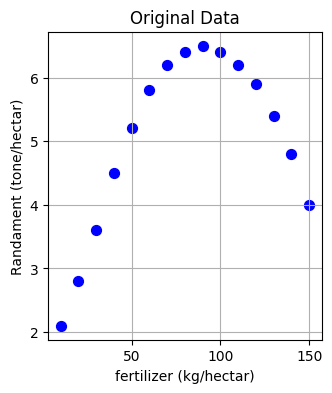

In [56]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(fertilizer, randament, color="blue", s=50)
plt.xlabel("fertilizer (kg/hectar)")
plt.ylabel("Randament (tone/hectar)")
plt.title("Original Data")
plt.grid(True)

In [68]:
degrees = [1, 2, 3, 4]  # vom calcula regresii polinomiale de ordinul 1, 2, 3 si 4
models = {}  
predictions = {} 

In [69]:
# pentru antrenarea și salvarea a câte un model de regresie pentru fiecare grad
def train_and_plot(degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(fertilizer)  # transformarea datelor de intrare (temperaturilor într-o formă adecvată funcției polinomiale)

    model = LinearRegression()  # încărcarea modelului
    model.fit(X_poly, randament)  # antrenarea modelului
    models[degree] = (poly, model)  # salvarea modelului

    y_pred = model.predict(X_poly)  # generarea predicțiilor
    predictions[degree] = y_pred  # salvarea predicțiilor

    # calcularea metricilor de evaluare
    mae = mean_absolute_error(randament, y_pred)
    mse = mean_squared_error(randament, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(randament, y_pred)

    # afișarea metricilor de evaluare
    print(f"\n=== Polynomial Degree {degree} ===")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")

    # afișarea coeficienților și a termenului liber a funcției
    print(f"Coefficients: {model.coef_}")   
    print(f"Intercept: {model.intercept_:.2f}")

    # pregătirea intervalelor de afișare pentru grafic
    fertilizer_range = np.linspace(10, 150, 200).reshape(-1, 1)
    X_poly_range = poly.transform(fertilizer_range)
    y_range = model.predict(X_poly_range)

    # afișarea graficului funcției
    plt.subplot(1, 4, degree)
    plt.scatter(fertilizer, randament, color="blue", s=50, label="Data")
    plt.plot(fertilizer_range, y_range, color="red", linewidth=2, label=f"Degree {degree}")
    plt.xlabel("Fertilizer (kg/hectar)")
    plt.ylabel("Randament (tone/hectar)")
    plt.title(f"Degree {degree} (R²={r2:.4f})")
    plt.legend()
    plt.grid(True)


=== Polynomial Degree 1 ===
MAE:  1.02
MSE:  1.34
RMSE: 1.16
R²:   0.2593
Coefficients: [0.         0.01585714]
Intercept: 3.78


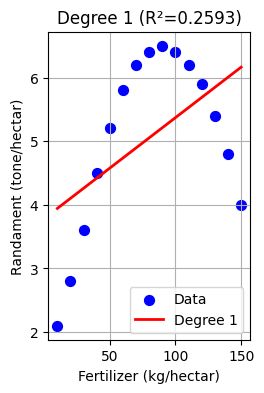

In [70]:
plt.figure(figsize=(12, 4))  # pentru afișarea corectă a graficului
train_and_plot(1)


=== Polynomial Degree 2 ===
MAE:  0.07
MSE:  0.01
RMSE: 0.10
R²:   0.9941
Coefficients: [ 0.          0.1271435  -0.00069554]
Intercept: 0.63


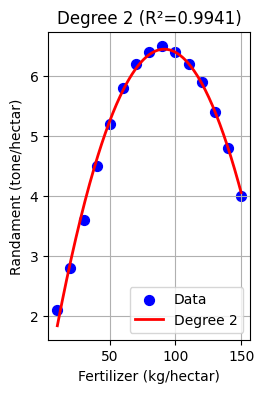

In [71]:
plt.figure(figsize=(12, 4))  # pentru afișarea corectă a graficului
train_and_plot(2)


=== Polynomial Degree 3 ===
MAE:  0.07
MSE:  0.01
RMSE: 0.09
R²:   0.9959
Coefficients: [ 0.00000000e+00  1.12591216e-01 -4.75328593e-04 -9.17546506e-07]
Intercept: 0.86


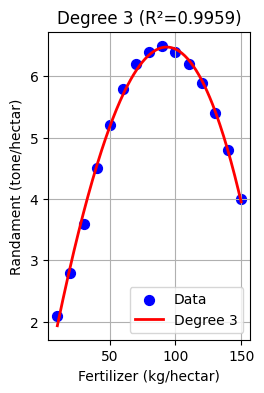

In [72]:
plt.figure(figsize=(12, 4))  # pentru afișarea corectă a graficului
train_and_plot(3)


=== Polynomial Degree 4 ===
MAE:  0.05
MSE:  0.00
RMSE: 0.06
R²:   0.9983
Coefficients: [ 0.00000000e+00  7.46243324e-02  5.14582299e-04 -1.03252699e-05
  2.93991355e-08]
Intercept: 1.25


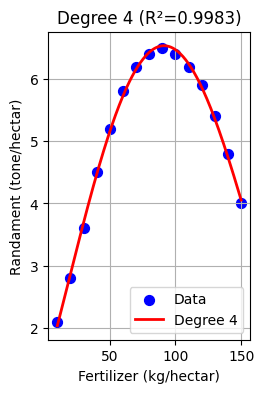

In [73]:
plt.figure(figsize=(12, 4))  # pentru afișarea corectă a graficului
train_and_plot(4)

SUB2

In [74]:
import matplotlib.pyplot as plt  # pentru grafice
import numpy as np  # pentru calcul algebric
from sklearn.linear_model import LinearRegression  # algoritmul de regresie liniară
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # metrici de evaluare

In [75]:
clients = np.array([50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]).reshape(-1, 1) # clients
sales = np.array([200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640])  # lei

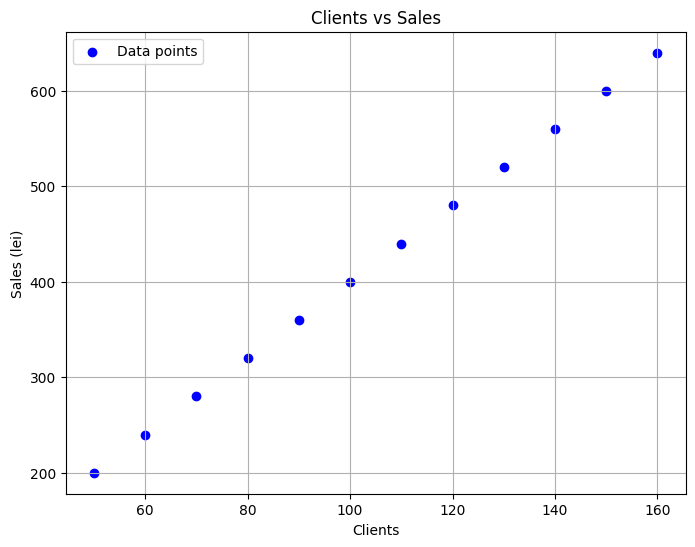

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(clients, sales, color='blue', label='Data points')
plt.xlabel('Clients')
plt.ylabel('Sales (lei)')
plt.title('Clients vs Sales')
plt.grid(True)
plt.legend()
plt.gca()
plt.show()

In [76]:
model = LinearRegression()
model.fit(clients, sales)  # antrenarea modelului

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [77]:
coef = model.coef_[0]
intercept = model.intercept_
print(f"Model Coefficients:")
print(f"  Coefficient: {coef:.2f}")
print(f"  Intercept: {intercept:.2f}")

Model Coefficients:
  Coefficient: 4.00
  Intercept: 0.00


=== Linear Regression Metrics ===
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R²: 1.0000


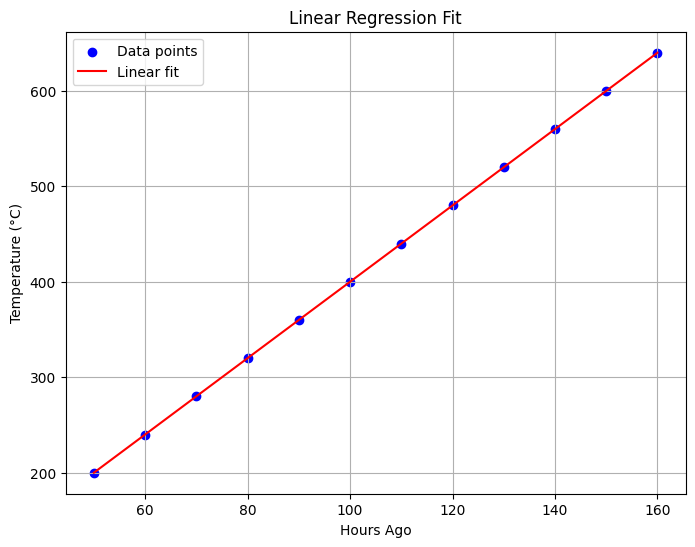


Prediction for 170 clients: [680.]


In [78]:
predictions = model.predict(clients)

mae = mean_absolute_error(sales, predictions)
mse = mean_squared_error(sales, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(sales, predictions)

print("=== Linear Regression Metrics ===")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(clients, sales, color='blue', label='Data points')
plt.plot(clients, predictions, color='red', label='Linear fit')
plt.xlabel('Hours Ago')
plt.ylabel('Temperature (°C)')
plt.title('Linear Regression Fit')
plt.grid(True)
plt.legend()
plt.gca()
plt.show()

prediction = np.array([[170]])
prediction_next = model.predict(prediction)
print(f"\nPrediction for 170 clients: {prediction_next}")